# Skin Cancer Prediction

## Importing Libraries

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense , Conv2D , MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [17]:
import numpy as np

## Reading Data and Labelling 

In [19]:
labels = []
images = []

for class_name in os.listdir('data'):
    class_path = os.path.join('data', class_name)
    files = os.listdir(class_path)[:300]
    for file in files:
        img_path = os.path.join(class_path,file)
        labels.append(class_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224))

        images.append(img)
    
        
                    

In [7]:
images

[array([[[210, 199, 219],
         [220, 208, 221],
         [223, 204, 218],
         ...,
         [192, 177, 206],
         [190, 173, 205],
         [190, 173, 206]],
 
        [[210, 199, 217],
         [220, 209, 221],
         [230, 202, 215],
         ...,
         [189, 173, 206],
         [187, 169, 204],
         [191, 174, 204]],
 
        [[207, 193, 212],
         [218, 201, 219],
         [219, 192, 210],
         ...,
         [187, 174, 205],
         [187, 170, 205],
         [189, 172, 205]],
 
        ...,
 
        [[166, 142, 188],
         [165, 146, 192],
         [165, 148, 192],
         ...,
         [244, 220, 222],
         [223, 208, 214],
         [192, 184, 204]],
 
        [[176, 146, 188],
         [172, 146, 191],
         [167, 148, 191],
         ...,
         [224, 212, 221],
         [243, 219, 225],
         [232, 206, 213]],
 
        [[172, 156, 188],
         [175, 149, 190],
         [172, 147, 192],
         ...,
         [201, 189, 210],
  

## Normalizing the data

In [21]:
X = np.array(images)/225.0
Y = np.array(labels)

In [10]:
X.shape

(1434, 224, 224, 3)

In [11]:
Y.shape

(1434,)

In [15]:
Y

array(['basal cell carcinoma', 'basal cell carcinoma',
       'basal cell carcinoma', ..., 'vascular lesion', 'vascular lesion',
       'vascular lesion'], dtype='<U26')

In [23]:
le = LabelEncoder()
labelled_y = le.fit_transform(Y)

In [19]:
labelled_y

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1288888888888888].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013333333333333334..1.1333333333333333].


Text(0.5, 1.0, 'melanoma')

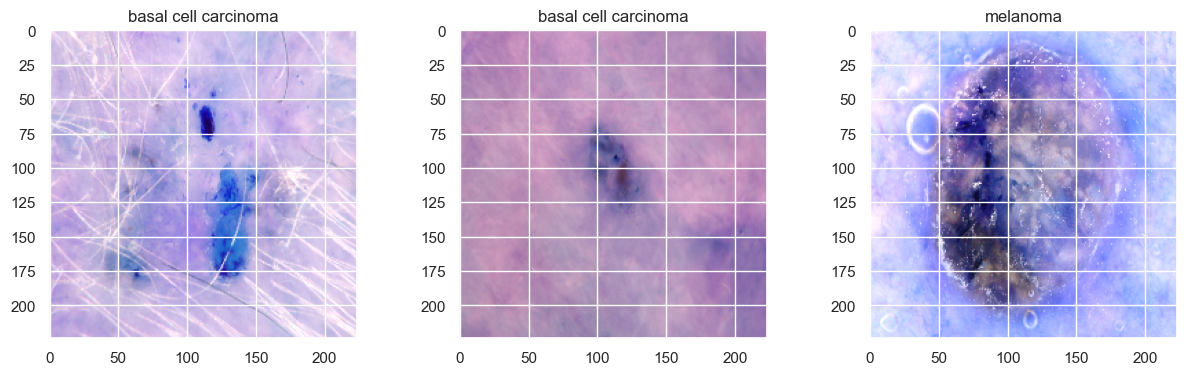

In [21]:
fig, axis = plt.subplots(1,3, figsize = (15,4))
axis[0].imshow(X[0])
axis[0].set_title(labels[0])

axis[1].imshow(X[202])
axis[1].set_title(labels[202])

axis[2].imshow(X[402])
axis[2].set_title(labels[402])

In [25]:
onehot = to_categorical(labelled_y)

In [23]:
onehot

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
from sklearn.utils import shuffle

x_shuffle, y_shuffle = shuffle(X, onehot, random_state = 42)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_shuffle, y_shuffle, test_size = 0.2, random_state = 42)

## Model 

In [124]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu',input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(pool_size =(3,3)),
    Flatten(),
    Dense(128, activation = 'relu' ),
    Dense(128, activation = 'relu' ),
    Dense(6, activation = 'softmax')
])

In [126]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics='accuracy')

In [128]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 82944)             0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [120]:
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 100
epochs = 30
callback = EarlyStopping(patience= 3, restore_best_weights = True)

history = model.fit(
    x_train,
    y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = (x_test,y_test),
    callbacks = callback,
    verbose = 2
)

Epoch 1/30
9/9 - 33s - loss: 1.7748 - accuracy: 0.1959 - val_loss: 1.7473 - val_accuracy: 0.1739 - 33s/epoch - 4s/step
Epoch 2/30
9/9 - 32s - loss: 1.6868 - accuracy: 0.2696 - val_loss: 1.7626 - val_accuracy: 0.2560 - 32s/epoch - 4s/step
Epoch 3/30
9/9 - 43s - loss: 1.5737 - accuracy: 0.3229 - val_loss: 1.5100 - val_accuracy: 0.3043 - 43s/epoch - 5s/step
Epoch 4/30
9/9 - 48s - loss: 1.4724 - accuracy: 0.3664 - val_loss: 1.4367 - val_accuracy: 0.4106 - 48s/epoch - 5s/step
Epoch 5/30
9/9 - 32s - loss: 1.3807 - accuracy: 0.4232 - val_loss: 1.2959 - val_accuracy: 0.4444 - 32s/epoch - 4s/step
Epoch 6/30
9/9 - 32s - loss: 1.2656 - accuracy: 0.4547 - val_loss: 1.2391 - val_accuracy: 0.5024 - 32s/epoch - 4s/step
Epoch 7/30
9/9 - 32s - loss: 1.2602 - accuracy: 0.4933 - val_loss: 1.1944 - val_accuracy: 0.5072 - 32s/epoch - 4s/step
Epoch 8/30
9/9 - 32s - loss: 1.1122 - accuracy: 0.5550 - val_loss: 1.1100 - val_accuracy: 0.5700 - 32s/epoch - 4s/step
Epoch 9/30
9/9 - 31s - loss: 1.0013 - accuracy: 

In [122]:
model.save('model_57.h5')

In [134]:
batch_size_1 = 150
epochs = 30
callback = EarlyStopping(patience= 3, restore_best_weights = True)

history_2 = model.fit(
    x_train,
    y_train,
    epochs = epochs,
    batch_size = batch_size_1,
    validation_data = (x_test,y_test),
    callbacks = callback,
    verbose = 2
)

Epoch 1/30
6/6 - 43s - loss: 0.7620 - accuracy: 0.7255 - val_loss: 1.0307 - val_accuracy: 0.6280 - 43s/epoch - 7s/step
Epoch 2/30
6/6 - 38s - loss: 0.6880 - accuracy: 0.7497 - val_loss: 1.0708 - val_accuracy: 0.6087 - 38s/epoch - 6s/step
Epoch 3/30
6/6 - 35s - loss: 0.6707 - accuracy: 0.7521 - val_loss: 0.9900 - val_accuracy: 0.6280 - 35s/epoch - 6s/step
Epoch 4/30
6/6 - 29s - loss: 0.6026 - accuracy: 0.8065 - val_loss: 1.0587 - val_accuracy: 0.6039 - 29s/epoch - 5s/step
Epoch 5/30
6/6 - 29s - loss: 0.6085 - accuracy: 0.7703 - val_loss: 1.0268 - val_accuracy: 0.6232 - 29s/epoch - 5s/step
Epoch 6/30
6/6 - 26s - loss: 0.6290 - accuracy: 0.7799 - val_loss: 1.0307 - val_accuracy: 0.5749 - 26s/epoch - 4s/step


In [132]:
model.save('model_62.h5')

In [39]:
from tensorflow.keras.layers import BatchNormalization, Dropout


In [51]:

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics='accuracy')

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

batch_size = 100
epochs = 30
callback = EarlyStopping(patience= 3, restore_best_weights = True)

history_2 = model_2.fit(
    x_train,
    y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = (x_test,y_test),
    callbacks = callback,
    verbose = 2
)

Epoch 1/30
12/12 - 85s - loss: 15.6878 - accuracy: 0.3426 - val_loss: 8.9292 - val_accuracy: 0.1115 - 85s/epoch - 7s/step
Epoch 2/30
12/12 - 81s - loss: 2.9506 - accuracy: 0.3130 - val_loss: 32.7990 - val_accuracy: 0.1010 - 81s/epoch - 7s/step
Epoch 3/30
12/12 - 80s - loss: 1.9042 - accuracy: 0.3173 - val_loss: 48.6845 - val_accuracy: 0.1010 - 80s/epoch - 7s/step
Epoch 4/30
12/12 - 80s - loss: 1.7187 - accuracy: 0.3069 - val_loss: 54.2310 - val_accuracy: 0.1010 - 80s/epoch - 7s/step


In [150]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [152]:
def fitness_function(solution):
    lr = float(solution[0])        # Learning rate
    dropout = float(solution[1])   # Dropout
    filters = int(solution[2])     # Conv filters

    try:
        model = Sequential([
            Conv2D(filters, (3, 3), activation='relu', input_shape=input_shape),
            MaxPooling2D(),
            Dropout(dropout),
            Flatten(),
            Dense(64, activation='relu'),
            Dropout(dropout),
            Dense(num_classes, activation='softmax')
        ])

        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(x_train, y_train, epochs=1, batch_size=16,
                            validation_split=0.2, verbose=0)

        val_acc = history.history['val_accuracy'][-1]
        return 1 - val_acc  # minimize 1 - accuracy
    except Exception as e:
        print(f"Error during model training: {e}")
        return 1.0  # penalize failed configurations


In [166]:
from mealpy.swarm_based import HHO
from tensorflow.keras.optimizers import Adam
from mealpy.utils.problem import Problem
from mealpy.utils.space import FloatVar, IntegerVar
from tensorflow.keras.layers import Dropout

space = [
    FloatVar(1e-5, 1e-2),   # learning rate
    FloatVar(0.1, 0.5),     # dropout
    IntegerVar(16, 64),     # filters
]

problem = Problem(
    obj_func=fitness_function,
    bounds=space,
    minmax="min",
    verbose=True
)

model_hho = HHO.OriginalHHO(epoch=5, pop_size=5)
best = model_hho.solve(problem)


best_lr = best.solution[0]
best_dropout = best.solution[1]
best_filters = int(best.solution[2])
best_acc = 1 - best.target.objectives[0]


print("\n✅ Best Hyperparameters Found:")
print(f"Learning Rate: {best_lr:.6f}")
print(f"Dropout: {best_dropout:.2f}")
print(f"Filters: {best_filters}")
print(f"Validation Accuracy: {best_acc:.4f}")


2025/07/15 11:17:40 PM, INFO, mealpy.swarm_based.HHO.OriginalHHO: OriginalHHO(epoch=5, pop_size=5)
2025/07/15 11:22:43 PM, INFO, mealpy.swarm_based.HHO.OriginalHHO: >>>Problem: P, Epoch: 1, Current best: 0.5542168617248535, Global best: 0.5542168617248535, Runtime: 187.52804 seconds
2025/07/15 11:24:43 PM, INFO, mealpy.swarm_based.HHO.OriginalHHO: >>>Problem: P, Epoch: 2, Current best: 0.5542168617248535, Global best: 0.5542168617248535, Runtime: 120.78256 seconds
2025/07/15 11:27:26 PM, INFO, mealpy.swarm_based.HHO.OriginalHHO: >>>Problem: P, Epoch: 3, Current best: 0.5542168617248535, Global best: 0.5542168617248535, Runtime: 162.33895 seconds
2025/07/15 11:28:40 PM, INFO, mealpy.swarm_based.HHO.OriginalHHO: >>>Problem: P, Epoch: 4, Current best: 0.5542168617248535, Global best: 0.5542168617248535, Runtime: 74.67123 seconds
2025/07/15 11:31:48 PM, INFO, mealpy.swarm_based.HHO.OriginalHHO: >>>Problem: P, Epoch: 5, Current best: 0.5542168617248535, Global best: 0.5542168617248535, Runt


✅ Best Hyperparameters Found:
Learning Rate: 0.002103
Dropout: 0.10
Filters: 15
Validation Accuracy: 0.4458


In [170]:
model.save('model_hho_45.h5')

In [63]:
from tensorflow.keras.optimizers import Adam

In [65]:
best_filters = 32        
best_dropout = 0.3    
best_lr = 0.001          

model_3 = Sequential([
    Conv2D(best_filters, (3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Dropout(best_dropout),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(best_dropout),
    Dense(6, activation='softmax')
])

model_3.compile(optimizer=Adam(learning_rate=best_lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [75]:
callback = EarlyStopping(patience= 3, restore_best_weights = True)

history = model_3.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=30, batch_size=16, verbose=1,
                     callbacks = callback
                     )

Epoch 1/30
72/72 [==============================] - 28s 385ms/step - loss: 0.5431 - accuracy: 0.8126 - val_loss: 1.3590 - val_accuracy: 0.5331
Epoch 2/30
72/72 [==============================] - 27s 382ms/step - loss: 0.4581 - accuracy: 0.8579 - val_loss: 1.3076 - val_accuracy: 0.5784
Epoch 3/30
72/72 [==============================] - 27s 378ms/step - loss: 0.5191 - accuracy: 0.8239 - val_loss: 1.5551 - val_accuracy: 0.5261
Epoch 4/30
72/72 [==============================] - 28s 392ms/step - loss: 0.4741 - accuracy: 0.8344 - val_loss: 1.4762 - val_accuracy: 0.5261
Epoch 5/30
72/72 [==============================] - 27s 380ms/step - loss: 0.3669 - accuracy: 0.8745 - val_loss: 1.3436 - val_accuracy: 0.5470


In [77]:
model_3.save('model_87.h5')

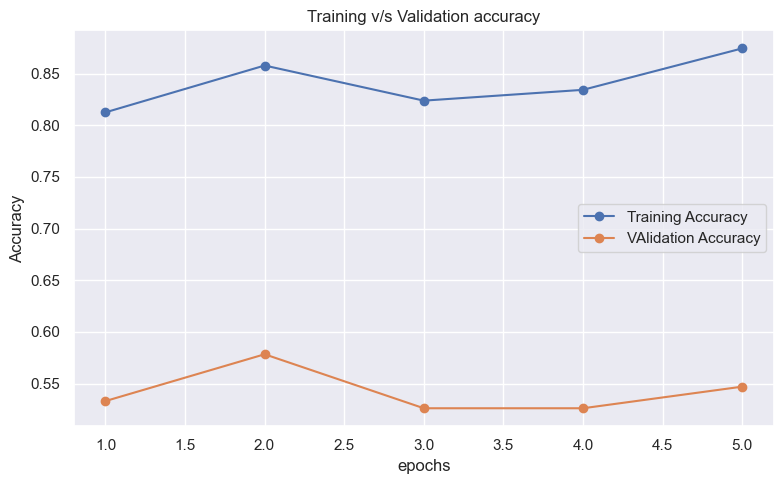

In [91]:
accuracy = history.history['accuracy']
val_accu = history.history['val_accuracy']
epochs = range(1, len(accuracy)+1)

plt.figure(figsize = (8,5))
plt.plot(epochs, accuracy,label = 'Training Accuracy', marker = 'o')
plt.plot(epochs, val_accu, label = 'VAlidation Accuracy', marker ='o')
plt.title('Training v/s Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
model_4 = Sequential([
    Conv2D(64, (3,3), activation = 'relu', input_shape= (224,224,3)),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.3),
    Dense(6, activation = 'softmax')
    
])


model_4.compile(loss = 'categorical_crossentropy', optimizer =  Adam(learning_rate = 1e-4), metrics = 'accuracy')

In [101]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 373248)            0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [103]:
history_4 = model_4.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    callbacks = callback,
    epochs = 50,
    batch_size = 100,
    verbose = 1
)

Epoch 1/50
12/12 [==============================] - 155s 13s/step - loss: 2.8778 - accuracy: 0.2101 - val_loss: 1.8065 - val_accuracy: 0.4634
Epoch 2/50
12/12 [==============================] - 154s 13s/step - loss: 1.6381 - accuracy: 0.3522 - val_loss: 1.4497 - val_accuracy: 0.4634
Epoch 3/50
12/12 [==============================] - 156s 13s/step - loss: 1.3966 - accuracy: 0.4507 - val_loss: 1.4041 - val_accuracy: 0.4460
Epoch 4/50
12/12 [==============================] - 156s 13s/step - loss: 1.3116 - accuracy: 0.4560 - val_loss: 1.2540 - val_accuracy: 0.5436
Epoch 5/50
12/12 [==============================] - 156s 13s/step - loss: 1.2113 - accuracy: 0.5257 - val_loss: 1.1853 - val_accuracy: 0.5296
Epoch 6/50
12/12 [==============================] - 153s 13s/step - loss: 1.1198 - accuracy: 0.5719 - val_loss: 1.1553 - val_accuracy: 0.5575
Epoch 7/50
12/12 [==============================] - 162s 13s/step - loss: 1.0730 - accuracy: 0.6207 - val_loss: 1.1618 - val_accuracy: 0.5436
Epoch 

In [1]:
  accuracy = history_4.history['accuracy']
val_accu = history.history['val_accuracy']
epochs = range(1, len(accuracy)+1)

plt.figure(figsize = (8,5))
plt.plot(epochs, accuracy,label = 'Training Accuracy', marker = 'o')
plt.plot(epochs, val_accu, label = 'VAlidation Accuracy', marker ='o')
plt.title('Training v/s Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'history_4' is not defined

In [5]:
import tensorflow as tf

In [9]:
model_4 = tf.keras.models.load_model('model_76_fit.h5')

In [45]:
y_pred = model_4.predict(x_test)

9/9 [==============================] - 7s 773ms/step


In [47]:
y_pred = y_pred.round()

In [49]:
y_pred =y_pred.argmax(axis =1)

In [51]:
y_pred

array([2, 0, 2, 2, 0, 0, 4, 0, 4, 0, 3, 5, 5, 0, 4, 0, 2, 5, 2, 4, 3, 0,
       0, 0, 2, 2, 5, 0, 0, 0, 4, 2, 2, 0, 0, 0, 0, 4, 5, 3, 4, 0, 0, 0,
       3, 0, 4, 4, 2, 0, 0, 3, 4, 0, 5, 0, 3, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 3, 5, 0, 3, 0, 0, 5, 2, 4, 4, 0, 4, 0, 0, 4, 4, 0, 2, 0, 3, 3,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 4, 2, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0,
       2, 3, 2, 2, 0, 2, 0, 0, 4, 5, 4, 0, 4, 3, 3, 2, 3, 3, 0, 0, 0, 2,
       0, 0, 0, 4, 5, 2, 4, 0, 0, 0, 3, 2, 2, 2, 3, 0, 4, 0, 0, 0, 2, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 4, 0, 2, 5, 3, 5, 0, 5, 0, 2,
       2, 3, 0, 5, 2, 0, 0, 2, 3, 2, 2, 0, 0, 0, 2, 3, 0, 3, 0, 0, 2, 4,
       0, 0, 4, 3, 0, 3, 0, 0, 4, 3, 0, 2, 0, 2, 0, 3, 2, 0, 3, 0, 5, 3,
       0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 4, 2, 0, 0, 4, 0, 3,
       2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0, 4, 2, 5, 2, 3, 4, 4, 3, 2, 4,
       2, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 2, 4, 3, 0, 2, 0, 0, 3, 0, 0,
       4], dtype=int64)

In [65]:
y_true = y_test.argmax(axis= 1)

In [67]:
y_true

array([2, 1, 2, 2, 5, 0, 4, 0, 4, 1, 2, 5, 5, 4, 4, 0, 2, 5, 2, 4, 2, 1,
       4, 4, 3, 2, 5, 0, 3, 0, 4, 2, 3, 0, 0, 4, 2, 4, 5, 3, 0, 4, 5, 0,
       3, 1, 2, 1, 2, 0, 1, 3, 4, 2, 5, 1, 3, 2, 2, 0, 4, 0, 4, 3, 2, 2,
       2, 2, 5, 0, 3, 0, 5, 0, 2, 4, 4, 1, 4, 0, 1, 4, 4, 0, 2, 0, 3, 2,
       1, 3, 0, 1, 4, 3, 2, 0, 1, 2, 3, 5, 3, 4, 0, 1, 3, 0, 3, 0, 3, 5,
       2, 3, 2, 2, 4, 2, 2, 4, 0, 5, 2, 1, 4, 3, 3, 2, 2, 3, 5, 2, 4, 2,
       3, 2, 4, 0, 5, 2, 4, 0, 5, 2, 2, 2, 2, 2, 3, 0, 4, 1, 0, 0, 3, 4,
       4, 0, 4, 0, 4, 2, 0, 0, 3, 3, 2, 3, 4, 5, 2, 5, 2, 5, 0, 5, 4, 2,
       4, 2, 3, 0, 2, 3, 0, 2, 0, 2, 2, 0, 0, 1, 2, 3, 5, 3, 0, 1, 3, 4,
       4, 0, 0, 4, 2, 3, 5, 5, 4, 2, 0, 2, 0, 2, 3, 3, 2, 2, 3, 0, 5, 3,
       4, 3, 0, 1, 0, 3, 2, 5, 0, 0, 5, 4, 0, 3, 0, 4, 2, 0, 4, 4, 4, 4,
       2, 3, 0, 0, 0, 0, 3, 0, 0, 4, 3, 5, 4, 2, 5, 2, 2, 2, 4, 3, 2, 4,
       1, 4, 2, 0, 0, 5, 0, 4, 0, 4, 0, 3, 2, 0, 3, 4, 2, 0, 3, 3, 0, 0,
       4], dtype=int64)

In [83]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

classification_report(y_true,y_pred)

C:\Users\gowth\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gowth\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gowth\anaconda3\envs\my_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.43      0.87      0.57        67\n           1       0.00      0.00      0.00        19\n           2       0.78      0.62      0.69        69\n           3       0.68      0.58      0.63        48\n           4       0.68      0.47      0.56        55\n           5       0.82      0.48      0.61        29\n\n    accuracy                           0.59       287\n   macro avg       0.57      0.50      0.51       287\nweighted avg       0.62      0.59      0.57       287\n'

In [89]:
 precision_score(y_true,y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].